# Lecture 1 exercises

Shunyu Wu   21-119-631

### Exercise 1

In [1]:
import scipy.io # import the io module of scipy
ecg_dict = scipy.io.loadmat('A0001.mat')
ecg_data = ecg_dict['val'] # access data from the dictionary

### Exercise 1a

In [2]:
print(ecg_data.shape)

(12, 7500)


The recording has 12 leads and each contains 7500 time points.

### Exercise 1b

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
frequency = 500
times = np.arange(ecg_data.shape[1]) / frequency

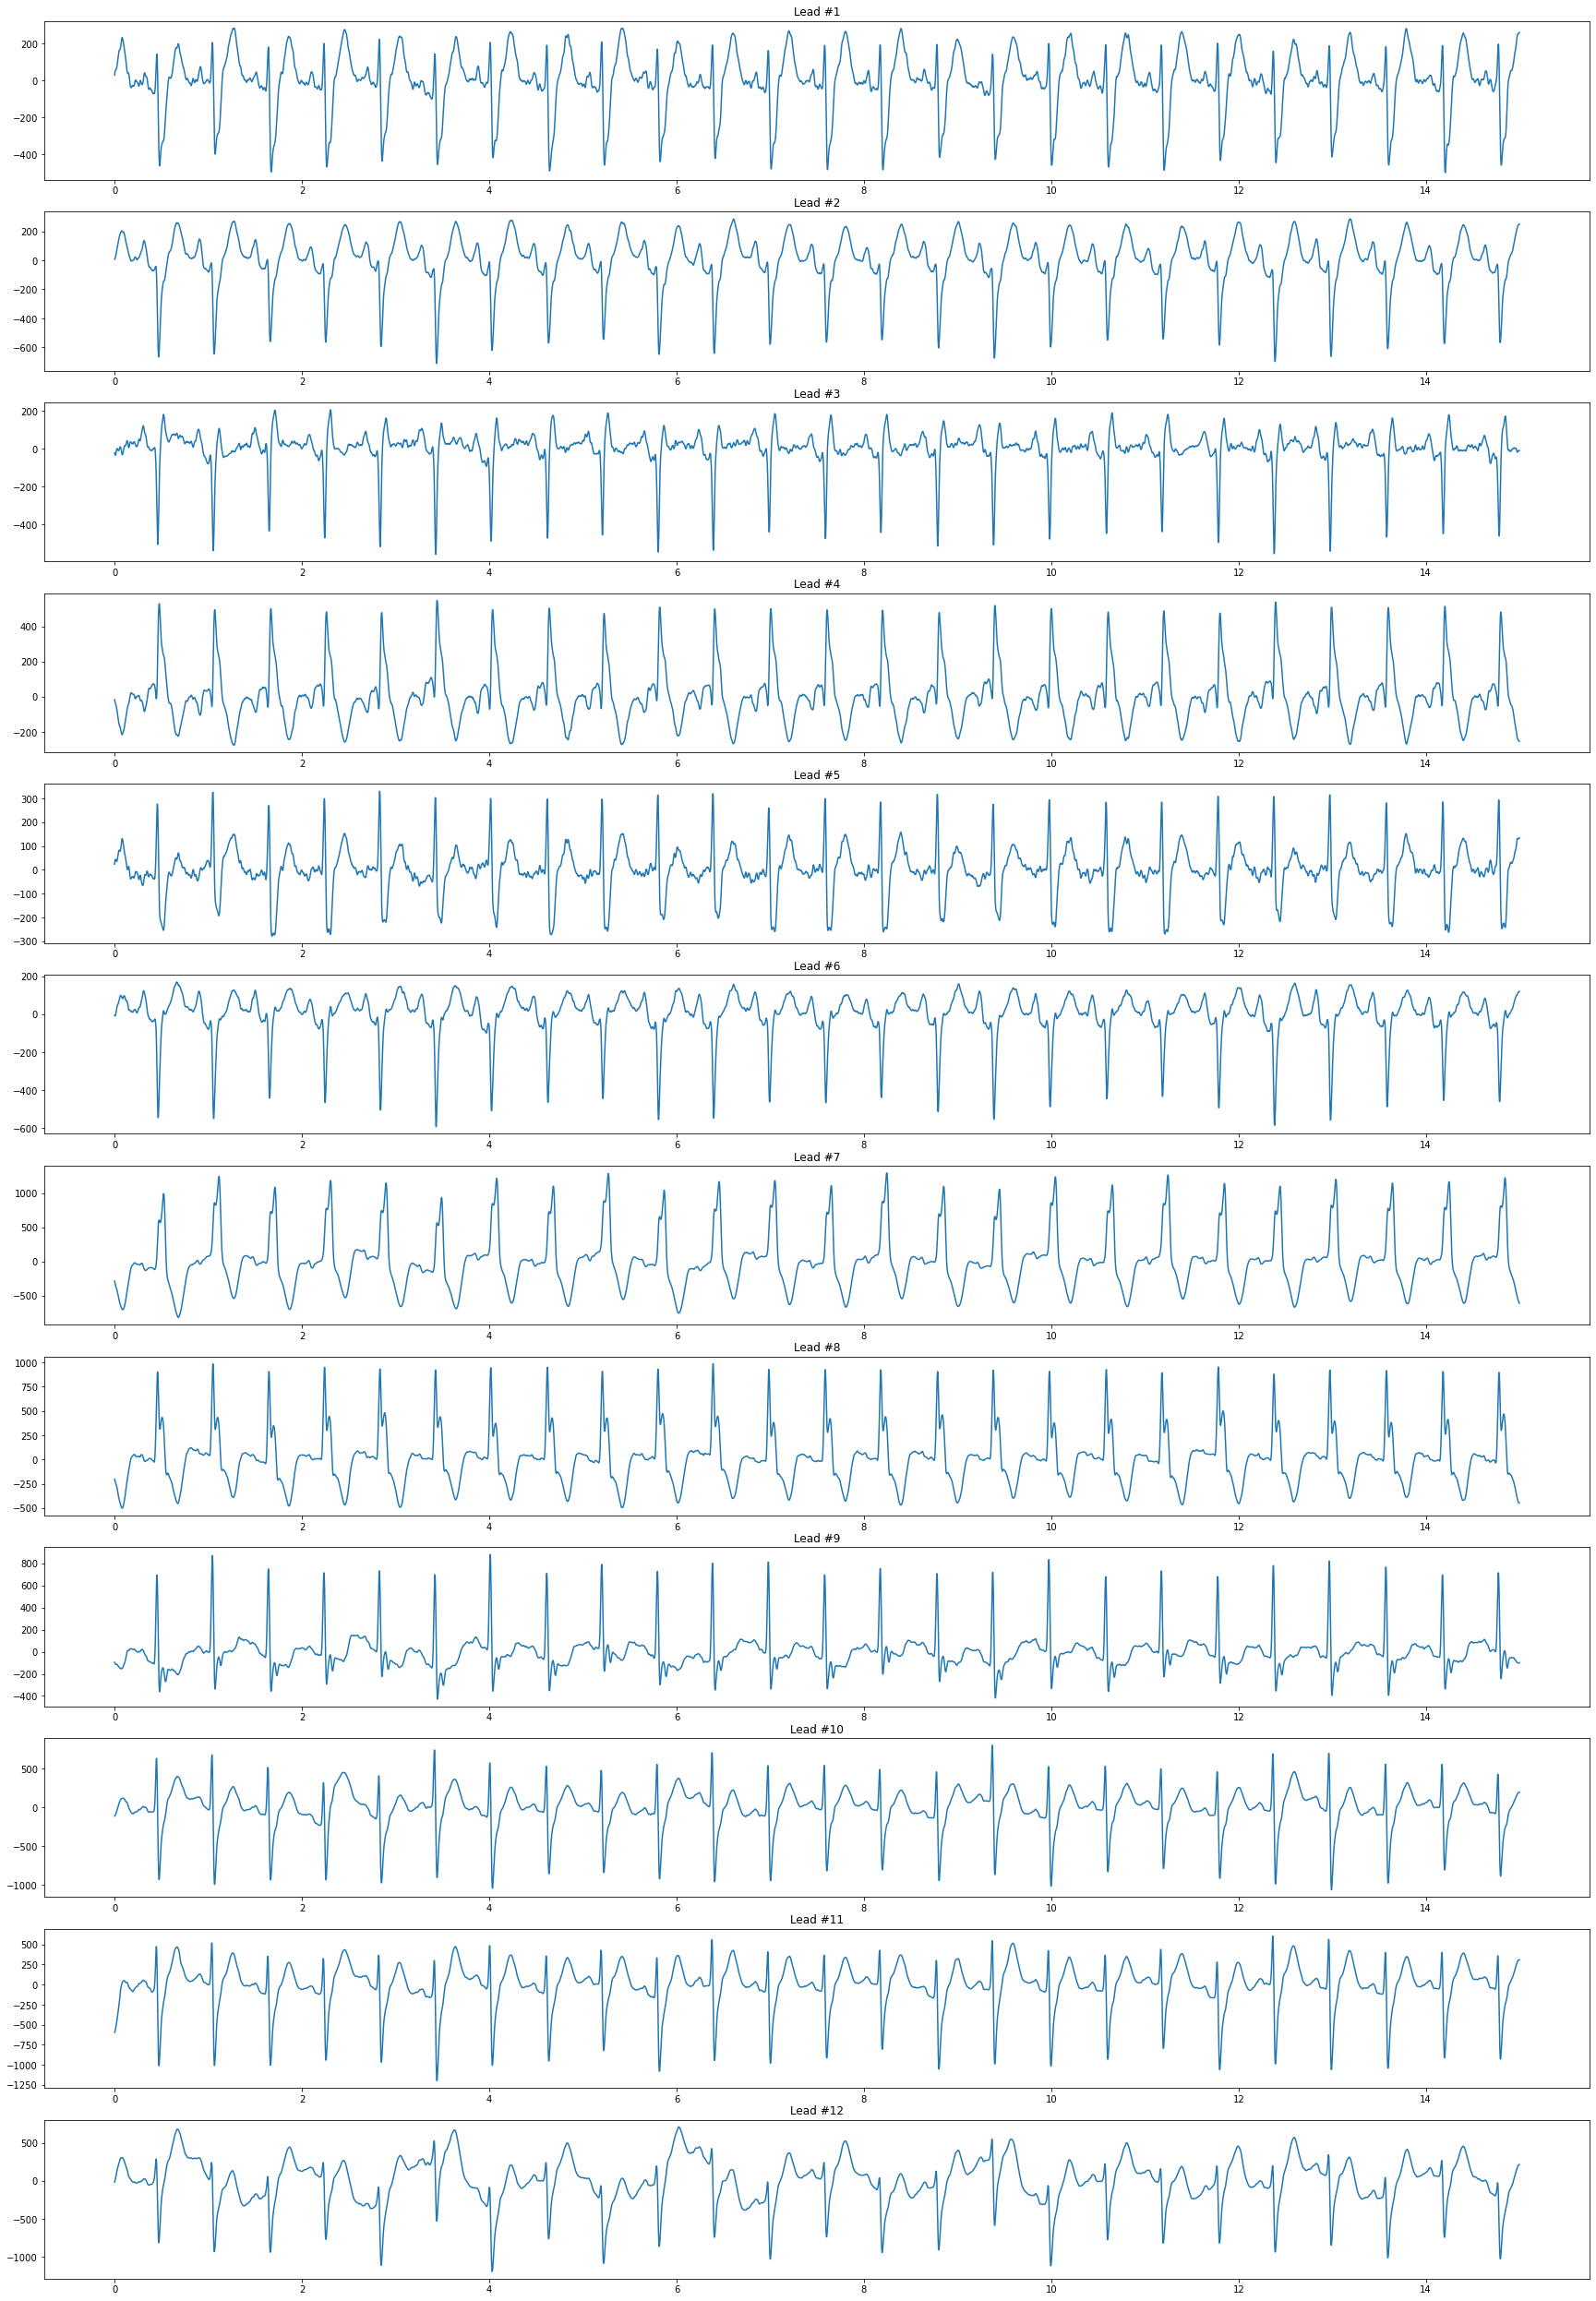

In [5]:
# Set the size of the figure
plt.figure(figsize=(30, 45))

# Set up a subplot grid that has height 12 and width 1,
# and set each subplot as active one by one.

for i in range(12):
    plt.subplot(12, 1, i+1)
    plt.plot(times, ecg_data[i, :])
    plt.title('Lead #%d' % (i+1))


# Show the figure.
plt.show()

I am not sure but Lead #9 looks like a normal ECG graph with P,T waves and QRS complex.

### Exercise 1c

In [6]:
# compute mean over leads
lead_mean = ecg_data.mean(axis = 1)
# computer std over leads
lead_std = ecg_data.std(axis = 1)
print(lead_mean)
print(lead_std)

[-0.2288      0.27053333  0.49933333  0.49066667 -0.3552     -0.19986667
  0.052       0.02093333 -0.34066667  0.00653333 -0.0428     -0.41493333]
[156.34027392 173.64671341 100.33305803 157.31448094  98.33956257
 118.12947665 416.04979697 268.77091155 159.47067467 250.17230827
 270.4107713  302.00314628]


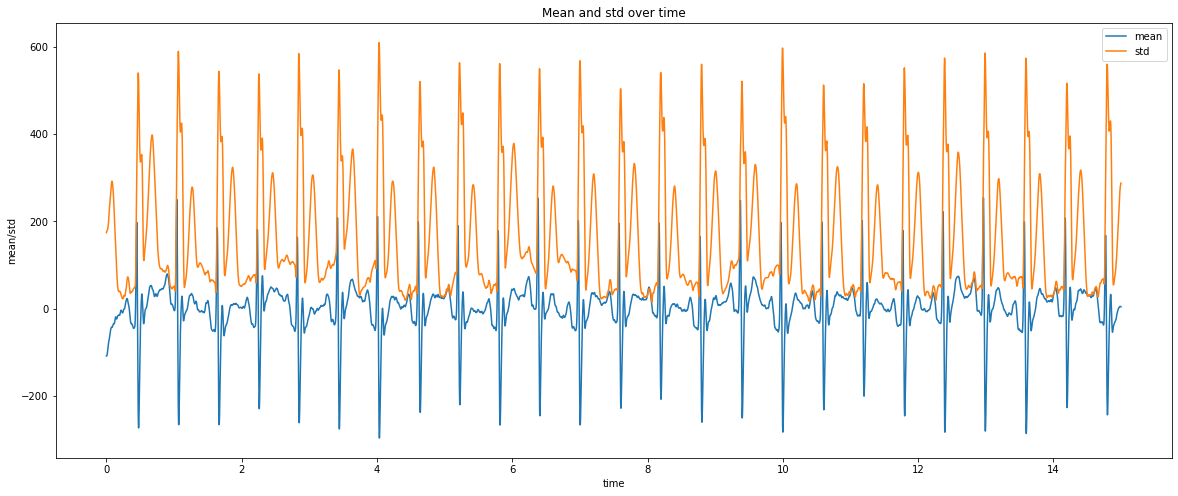

In [7]:
# compute all leads mean/std over time
avg_mean = ecg_data.mean(axis = 0)
avg_std = ecg_data.std(axis = 0)

# Plot the points using matplotlib
plt.figure(figsize=(20, 8))
plt.plot(times, avg_mean)
plt.plot(times, avg_std)
plt.xlabel('time')
plt.ylabel('mean/std')
plt.title('Mean and std over time')
plt.legend(['mean', 'std'])

### Exercise 2a


In [8]:
from scipy.signal import find_peaks

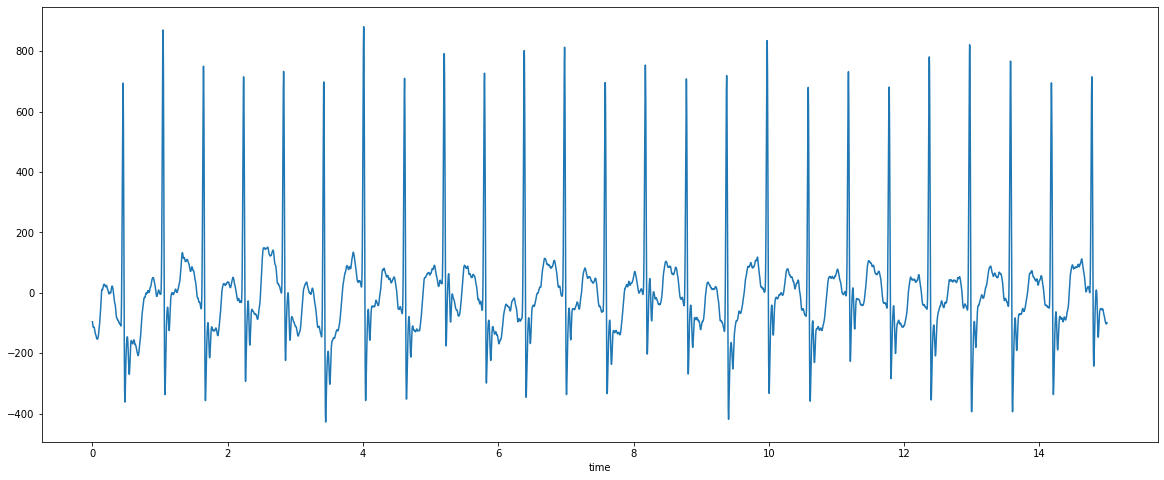

In [9]:
# I chose lead 9 in ex 1b, that is index 8
# plot of lead 9 
plt.figure(figsize=(20, 8))
plt.xlabel('time')
plt.plot(times, ecg_data[8, :])

it can be seen from the above plot that R-peaks are > 500, set height attribute to 500 to get rid of other local maximum

In [10]:
peaks, _ = find_peaks(ecg_data[8,:], height=600)
print(ecg_data[8,peaks])

[694 870 750 715 733 698 881 710 792 727 802 813 696 754 708 719 835 680
 732 681 781 821 767 695 715]


### Exercise 2b

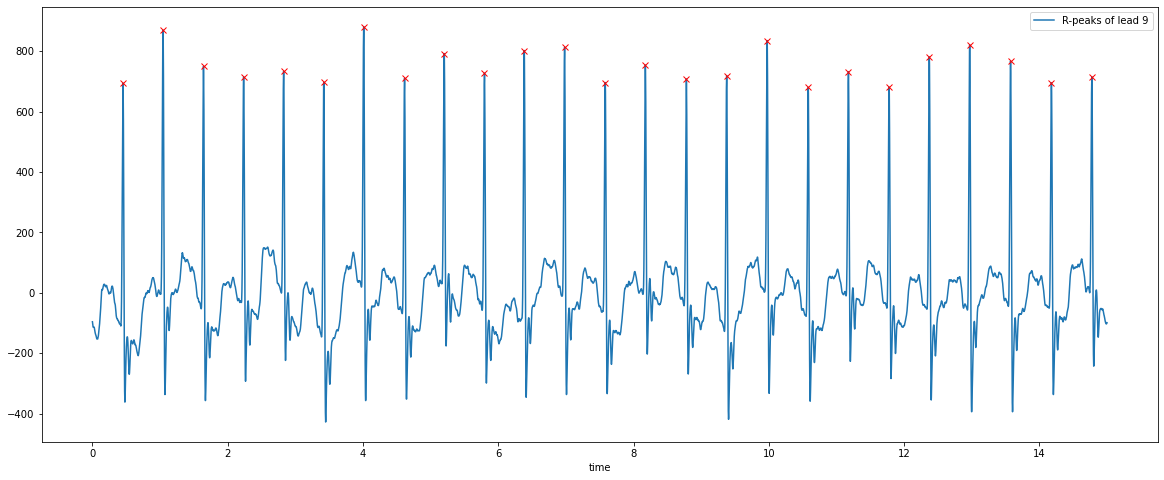

In [11]:
plt.figure(figsize=(20, 8))
# ECG data of lead 9
plt.plot(times, ecg_data[8, :])
plt.xlabel('time')
# Plot the peaks
plt.plot(peaks / frequency, ecg_data[8,peaks], "xr"); 
plt.legend(['R-peaks of lead 9'])